In [1]:
import pandas
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

alloc_order = ["ArrayAtomicF", "ArrayAtomicD", "ArrayLockedF", "ArrayLockedD",
               "ArrayAlignedF", "ArrayAlignedD", "TableF", "TableD",
               "ListLocal", "ListLocked", "Kernel"]


# Local Benchmarks

## 4K Pages

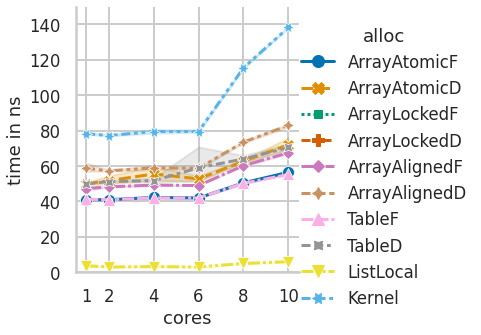

In [2]:
pgd = pandas.concat([
    pandas.read_csv("out/repeat.csv"),
    pandas.read_csv("keep/kernel_repeat.csv"),
], ignore_index=True)
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(ylim=(0, 150))
g.set(xlabel="cores")
g.set(ylabel="time in ns")


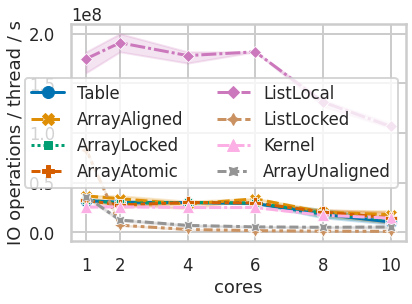

In [4]:
pgd = pandas.concat([
    pandas.read_csv("out/repeat.csv"),
    pandas.read_csv("keep/kernel_repeat.csv"),
], ignore_index=True)
# print("allocs:", pgd["allocs"][0])
pgd["get_avg"] = 10**9 / (pgd["get_avg"] / 2)
g = sns.lineplot(data=pgd, x="x", y="get_avg", style="alloc",
                 hue="alloc", markers=True,
                 style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(xlabel="cores")
g.set(ylabel="IO operations / thread / s")
g.legend(ncol=2)


## 2M Pages

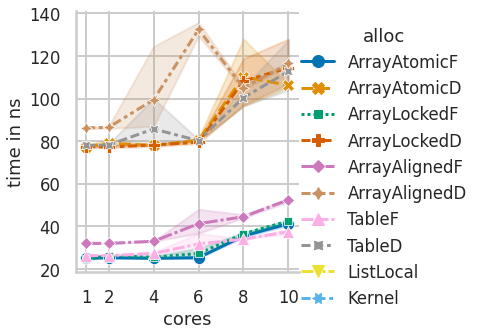

In [4]:
pgd = pandas.read_csv("out/repeat_s1.csv")
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
# g.set(ylim=(0, 100))
g.set(xlabel="cores")
g.set(ylabel="time in ns")


# Server Benchmarks

## Small Pages

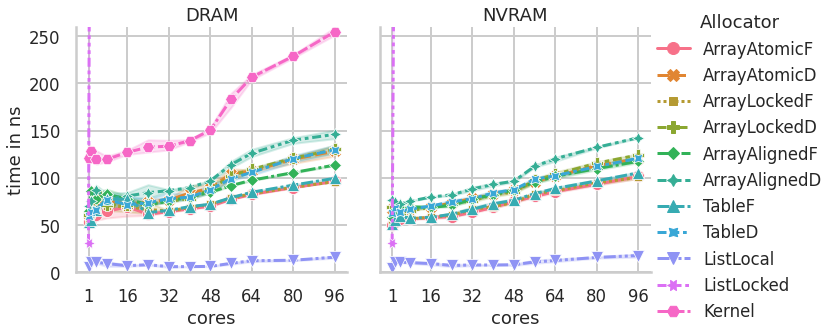

In [2]:
vd = pandas.concat([
    pandas.read_csv("remote/repeat_v.csv"),
    pandas.read_csv("keep/remote/kernel_repeat.csv")
], ignore_index=True)
vd["mem"] = "DRAM"
pd = pandas.read_csv("remote/repeat_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
g = sns.relplot(data=pgd, x="cores", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem",
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 260))
g.legend.set_title("Allocator")
g.set_titles("{col_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.savefig("../../text/thesis/plot/repeat.pdf")


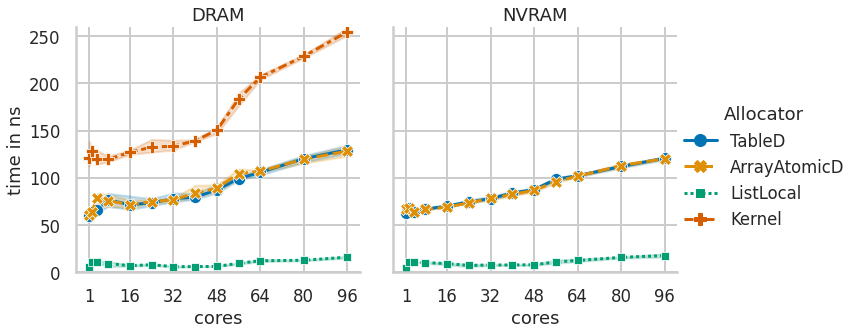

In [4]:
vd = pandas.concat([
    pandas.read_csv("remote/repeat_v.csv"),
    pandas.read_csv("keep/remote/kernel_repeat.csv")
], ignore_index=True)
vd["mem"] = "DRAM"

pd = pandas.read_csv("remote/repeat_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

order = ["TableD", "ArrayAtomicD", "ListLocal", "Kernel"]
# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
g = sns.relplot(data=pgd, x="cores", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 260))
g.legend.set_title("Allocator")
g.set_titles("{col_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.savefig("../../presentation/plot/repeat.pdf")


## Huge Pages

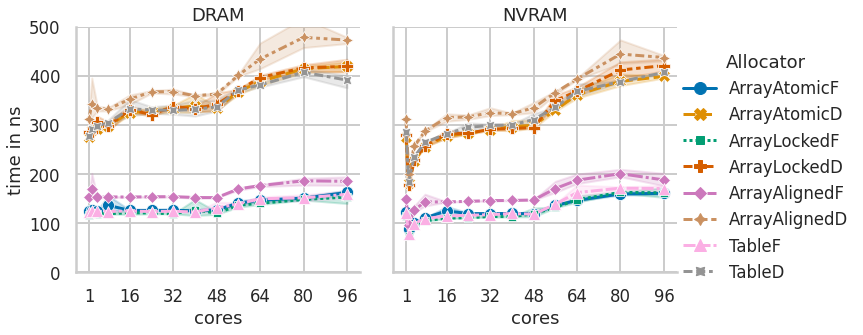

In [3]:
vd = pandas.concat([
    pandas.read_csv("remote/repeat_v1.csv"),
    # pandas.read_csv("keep/remote/kernel_repeat.csv")
], ignore_index=True)
vd["mem"] = "DRAM"
pd = pandas.read_csv("remote/repeat_p1.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
order = alloc_order[:-2]
g = sns.relplot(data=pgd, x="cores", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 500))
g.legend.set_title("Allocator")
g.set_titles("{col_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
# g.savefig("../../text/thesis/plot/repeat1.pdf")


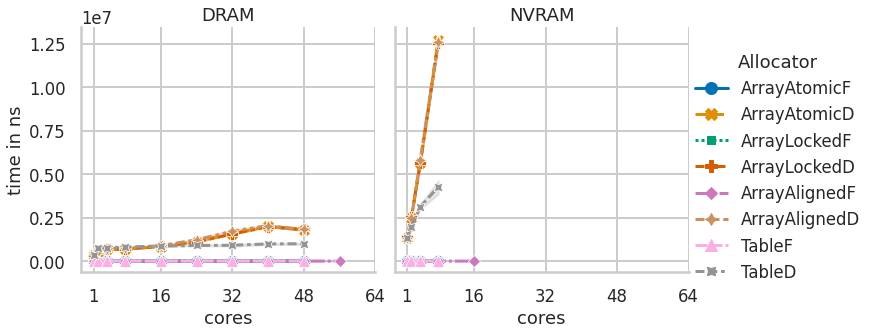

In [5]:
vd = pandas.concat([
    pandas.read_csv("remote/repeat_v2.csv"),
    # pandas.read_csv("keep/remote/kernel_repeat.csv")
], ignore_index=True)
vd["mem"] = "DRAM"
pd = pandas.read_csv("remote/repeat_p2.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
order = alloc_order[:-2]
g = sns.relplot(data=pgd, x="cores", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="mem",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64])
# g.set(ylim=(0, 500))
g.legend.set_title("Allocator")
g.set_titles("{col_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
# g.savefig("../../text/thesis/plot/repeat1.pdf")
